In [1]:
import os.path
from imutils import paths, resize
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense

from custom import get_letters_list2, normalize_image_size

import pickle

import pandas as pd
from random import choices
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
paths.list_images('grainy_samples/letters')

<generator object list_files at 0x000001593607E8E0>

In [3]:
data = []
labels = []
count = 0
for letter_path in paths.list_images('grainy_samples/letters'):
    image = cv2.imread(letter_path,0)
    
    # Resize image
    image = normalize_image_size(image,20,20)

    
    image = np.expand_dims(image, axis = 2)
    data.append(image)
    labels.append(letter_path.split(os.path.sep)[-2])
    count+=1
    if count%2000==0:
        print('Added image #%d'%count)


Added image #2000
Added image #4000
Added image #6000
Added image #8000
Added image #10000
Added image #12000
Added image #14000
Added image #16000
Added image #18000
Added image #20000
Added image #22000
Added image #24000
Added image #26000
Added image #28000
Added image #30000
Added image #32000
Added image #34000
Added image #36000
Added image #38000
Added image #40000
Added image #42000
Added image #44000
Added image #46000
Added image #48000
Added image #50000
Added image #52000
Added image #54000
Added image #56000
Added image #58000
Added image #60000
Added image #62000
Added image #64000
Added image #66000
Added image #68000
Added image #70000
Added image #72000
Added image #74000
Added image #76000
Added image #78000
Added image #80000
Added image #82000
Added image #84000
Added image #86000
Added image #88000
Added image #90000
Added image #92000
Added image #94000


In [4]:
data = np.array(data,dtype='float')/255.0
labels = np.array(labels)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size=0.25)

In [6]:
lb = LabelBinarizer().fit(y_train)
y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

In [27]:
model = Sequential()

In [29]:
model.add(Conv2D(20, (5, 5), padding="same", input_shape=(20, 20, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [30]:
model.add(Conv2D(50, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [32]:
model.add(Flatten())
model.add(Dense(500, activation="relu"))

In [34]:
model.add(Dense(19, activation="softmax"))

In [35]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=19, epochs=10, verbose=1)

Train on 71238 samples, validate on 23746 samples
Epoch 1/10
71238/71238 [==============================] - 177s 2ms/step - loss: 0.1620 - acc: 0.9571 - val_loss: 0.0582 - val_acc: 0.9859
Epoch 2/10
71238/71238 [==============================] - 176s 2ms/step - loss: 0.0465 - acc: 0.9877 - val_loss: 0.0587 - val_acc: 0.9864
Epoch 3/10
71238/71238 [==============================] - 176s 2ms/step - loss: 0.0315 - acc: 0.9912 - val_loss: 0.0532 - val_acc: 0.9877
Epoch 4/10
71238/71238 [==============================] - 172s 2ms/step - loss: 0.0220 - acc: 0.9938 - val_loss: 0.0536 - val_acc: 0.9877
Epoch 5/10
71238/71238 [==============================] - 174s 2ms/step - loss: 0.0167 - acc: 0.9951 - val_loss: 0.0630 - val_acc: 0.9869
Epoch 6/10
71238/71238 [==============================] - 178s 2ms/step - loss: 0.0138 - acc: 0.9962 - val_loss: 0.0679 - val_acc: 0.9872
Epoch 7/10
71238/71238 [==============================] - 176s 2ms/step - loss: 0.0116 - acc: 0.9968 - val_loss: 0.0688 - 

In [37]:
model.save('10Epoch_model.h5')

In [39]:
with open('model_label_map.dat','wb') as f:
    pickle.dump(lb,f)

In [42]:
test = get_letters_list2('test_CAPTCHA.png')
attempted_password = ''
for let in test:
    let = normalize_image_size(let)
    let = np.expand_dims(let,axis=2)
    let = np.expand_dims(let,axis=0)
    prediction = model.predict(let)
    letter_output = lb.inverse_transform(prediction)[0]
    attempted_password+=letter_output

In [43]:
attempted_password

'wvphnh'

In [56]:
test_list = os.listdir('grainy_samples/_10samples')
passwords_list = []
for test_path in test_list:
    letters_list = get_letters_list2('grainy_samples/_10samples/%s'%test_path)
    attempted_password = ''
    for letter_image in letters_list:
        letter_image = normalize_image_size(letter_image)
#         cv2.imshow('letter',letter_image)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()
        letter_image = np.expand_dims(letter_image,axis=2)
        letter_image = np.expand_dims(letter_image,axis=0)
        prediction = model.predict(letter_image)
        attempted_password += lb.inverse_transform(prediction)[0]
    passwords_list.append(attempted_password)
#     print(attempted_password)
        
df = pd.DataFrame({'Image Name:':test_list,'Model attempt:':passwords_list})
df

,Image Name:,Model attempt:
0,aqnqvy.jpg,uqnqvy
1,axwvgn.jpg,zxnvgn
2,dkxuyg.jpg,dkxuvg
3,ebcwuw.jpg,cbcwuw
4,eybvyx.jpg,cybvyx
5,gzdudp.jpg,szdudp
6,huykoz.jpg,huykcz
7,nqaxdk.jpg,xqqxdc
8,ppykyz.jpg,ccykzz
9,uwqpaa.jpg,unqpza


In [51]:
test_list

['aqnqvy.jpg',
 'axwvgn.jpg',
 'dkxuyg.jpg',
 'ebcwuw.jpg',
 'eybvyx.jpg',
 'gzdudp.jpg',
 'huykoz.jpg',
 'nqaxdk.jpg',
 'ppykyz.jpg',
 'uwqpaa.jpg',
 'xkyznc.jpg']

In [52]:
passwords_list

['uqnqvy',
 'zxnvgn',
 'dkxuvg',
 'cbcwuw',
 'cybvyx',
 'szdudp',
 'huykcz',
 'xqqxdc',
 'ccykzz',
 'unqpza',
 'xcyzcc']

In [5]:
len(X_train)

71238

In [6]:
len(X_test)

23746

# Determining Ideal Filter Number (1 of 2)

In [7]:
layer_one_filter = [10,20,30,50]
models_first_layer = []

for lay in layer_one_filter:
    model = Sequential()
    model.add(Conv2D(lay, (5, 5), padding="same", input_shape=(20, 20, 1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(50, (5, 5), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(500, activation="relu"))
    model.add(Dense(19, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=19, epochs=2, verbose=1)
    models_first_layer.append(model)

Train on 71238 samples, validate on 23746 samples
Epoch 1/2
71238/71238 [==============================] - 141s 2ms/step - loss: 0.1537 - acc: 0.9599 - val_loss: 0.0692 - val_acc: 0.9819
Epoch 2/2
71238/71238 [==============================] - 150s 2ms/step - loss: 0.0475 - acc: 0.9879 - val_loss: 0.0479 - val_acc: 0.9886
Train on 71238 samples, validate on 23746 samples
Epoch 1/2
71238/71238 [==============================] - 178s 2ms/step - loss: 0.1586 - acc: 0.9591 - val_loss: 0.0552 - val_acc: 0.9867
Epoch 2/2
71238/71238 [==============================] - 169s 2ms/step - loss: 0.0463 - acc: 0.9883 - val_loss: 0.0594 - val_acc: 0.9853
Train on 71238 samples, validate on 23746 samples
Epoch 1/2
71238/71238 [==============================] - 210s 3ms/step - loss: 0.1581 - acc: 0.9588 - val_loss: 0.0632 - val_acc: 0.9829
Epoch 2/2
71238/71238 [==============================] - 209s 3ms/step - loss: 0.0462 - acc: 0.9882 - val_loss: 0.0574 - val_acc: 0.9863
Train on 71238 samples, vali

In [8]:
num_inputs = len(layer_one_filter)
many_models = models_first_layer

for layer_index in range(num_inputs):
    many_models[layer_index].save('models/many_first_layer_filters/layerOne_%d.h5'%(layer_one_filter[layer_index]))

with open('models/many_first_layer_filters/model_label_map.dat','wb') as f:
    pickle.dump(lb,f)

In [39]:
test_list_full = os.listdir('grainy_samples/samples')
errors_matrix = []


for i in range(100):
    test_list = choices(test_list_full,k=10)
    passwords_list = []
    for model in many_models:
        for test_path in test_list:
            letters_list = get_letters_list2('grainy_samples/samples/%s'%test_path)
            if(type(letters_list[0])==str):
                break
            attempted_password = ''
            for letter_image in letters_list:
                letter_image = normalize_image_size(letter_image,20,20)
        #         cv2.imshow('letter',letter_image)
        #         cv2.waitKey(0)
        #         cv2.destroyAllWindows()
                letter_image = np.expand_dims(letter_image,axis=2)
                letter_image = np.expand_dims(letter_image,axis=0)
                prediction = model.predict(letter_image)
                attempted_password += lb.inverse_transform(prediction)[0]
            passwords_list.append(attempted_password)
    filtered_answers = [a.split('.')[0] for a in test_list]
#     print(len(passwords_list))
    if (len(passwords_list)/num_inputs)==len(filtered_answers):
        for j in range(num_inputs):
            for k in range(10):
                errors_per_model = sum([passwords_list[10*j:10*(j+1)][k][a]!=filtered_answers[k][a] for a in range(6)])
                errors_matrix.append(errors_per_model)
    print('Completed run #%d'%(i+1))
#     print(errors_per_model)

Completed run #1
Completed run #2
Completed run #3
Completed run #4
Completed run #5
Completed run #6
Completed run #7
Completed run #8
Completed run #9
Completed run #10
Completed run #11
Completed run #12
Completed run #13
Completed run #14
Completed run #15
Completed run #16
Completed run #17
Completed run #18
Completed run #19
Completed run #20
Completed run #21
Completed run #22
Completed run #23
Completed run #24
Completed run #25
Completed run #26
Completed run #27
Completed run #28
Completed run #29
Completed run #30
Completed run #31
Completed run #32
Completed run #33
Completed run #34
Completed run #35
Completed run #36
Completed run #37
Completed run #38
Completed run #39
Completed run #40
Completed run #41
Completed run #42
Completed run #43
Completed run #44
Completed run #45
Completed run #46
Completed run #47
Completed run #48
Completed run #49
Completed run #50
Completed run #51
Completed run #52
Completed run #53
Completed run #54
Completed run #55
Completed run #56
C

In [40]:
layerOne10 = []
layerOne20 = []
layerOne30 = []
layerOne50 = []


for i in range(int(len(errors_matrix)/40)):
    for j in range(10):
        layerOne10.append(errors_matrix[i*40+j])
        layerOne20.append(errors_matrix[40*i+10+j])
        layerOne30.append(errors_matrix[40*i+20+j])
        layerOne50.append(errors_matrix[40*i+30+j])


In [41]:
error_sums = [sum(layerOne10),sum(layerOne20),sum(layerOne30),sum(layerOne50)]

In [42]:
error_sums

[370, 534, 440, 449]

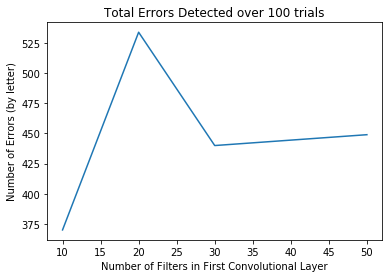

In [43]:

plt.plot(layer_one_filter,error_sums)
plt.title('Total Errors Detected over 100 trials')
plt.xlabel('Number of Filters in First Convolutional Layer')
plt.ylabel('Number of Errors (by letter)')
plt.show()

# Determining Ideal Filter Number (2 of 2)

In [16]:
layer_two_filter = [30,40,50,80]
many_models = []

for lay in layer_two_filter:
    model = Sequential()
    model.add(Conv2D(30, (5, 5), padding="same", input_shape=(20, 20, 1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(lay, (5, 5), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(500, activation="relu"))
    model.add(Dense(19, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=19, epochs=2, verbose=1)
    many_models.append(model)

Train on 71238 samples, validate on 23746 samples
Epoch 1/2
71238/71238 [==============================] - 164s 2ms/step - loss: 0.1611 - acc: 0.9572 - val_loss: 0.0601 - val_acc: 0.9844
Epoch 2/2
71238/71238 [==============================] - 164s 2ms/step - loss: 0.0466 - acc: 0.9883 - val_loss: 0.0535 - val_acc: 0.9873
Train on 71238 samples, validate on 23746 samples
Epoch 1/2
71238/71238 [==============================] - 177s 2ms/step - loss: 0.1511 - acc: 0.9610 - val_loss: 0.0664 - val_acc: 0.9832
Epoch 2/2
71238/71238 [==============================] - 187s 3ms/step - loss: 0.0460 - acc: 0.9880 - val_loss: 0.0467 - val_acc: 0.9883
Train on 71238 samples, validate on 23746 samples
Epoch 1/2
71238/71238 [==============================] - 209s 3ms/step - loss: 0.1608 - acc: 0.9578 - val_loss: 0.0581 - val_acc: 0.9853
Epoch 2/2
71238/71238 [==============================] - 216s 3ms/step - loss: 0.0479 - acc: 0.9875 - val_loss: 0.0509 - val_acc: 0.9882
Train on 71238 samples, vali

In [24]:
num_inputs = len(layer_two_filter)

for layer_index in range(num_inputs):
    many_models[layer_index].save('models/many_second_layer_filters/layerTwo_%d.h5'%(layer_two_filter[layer_index]))

with open('models/many_second_layer_filters/model_label_map.dat','wb') as f:
    pickle.dump(lb,f)

In [27]:
test_list_full = os.listdir('grainy_samples/samples')
errors_matrix = []


for i in range(100):
    test_list = choices(test_list_full,k=10)
    passwords_list = []
    for model in many_models:
        for test_path in test_list:
            letters_list = get_letters_list2('grainy_samples/samples/%s'%test_path)
            if(type(letters_list[0])==str):
                break
            attempted_password = ''
            for letter_image in letters_list:
                letter_image = normalize_image_size(letter_image,20,20)
        #         cv2.imshow('letter',letter_image)
        #         cv2.waitKey(0)
        #         cv2.destroyAllWindows()
                letter_image = np.expand_dims(letter_image,axis=2)
                letter_image = np.expand_dims(letter_image,axis=0)
                prediction = model.predict(letter_image)
                attempted_password += lb.inverse_transform(prediction)[0]
            passwords_list.append(attempted_password)
    filtered_answers = [a.split('.')[0] for a in test_list]
#     print(len(passwords_list))
    if (len(passwords_list)/num_inputs)==len(filtered_answers):
        for j in range(num_inputs):
            for k in range(10):
                errors_per_model = sum([passwords_list[10*j:10*(j+1)][k][a]!=filtered_answers[k][a] for a in range(6)])
                errors_matrix.append(errors_per_model)
    print('Completed run #%d'%(i+1))
#     print(errors_per_model)

Completed run #1
Completed run #2
Completed run #3
Completed run #4
Completed run #5
Completed run #6
Completed run #7
Completed run #8
Completed run #9
Completed run #10
Completed run #11
Completed run #12
Completed run #13
Completed run #14
Completed run #15
Completed run #16
Completed run #17
Completed run #18
Completed run #19
Completed run #20
Completed run #21
Completed run #22
Completed run #23
Completed run #24
Completed run #25
Completed run #26
Completed run #27
Completed run #28
Completed run #29
Completed run #30
Completed run #31
Completed run #32
Completed run #33
Completed run #34
Completed run #35
Completed run #36
Completed run #37
Completed run #38
Completed run #39
Completed run #40
Completed run #41
Completed run #42
Completed run #43
Completed run #44
Completed run #45
Completed run #46
Completed run #47
Completed run #48
Completed run #49
Completed run #50
Completed run #51
Completed run #52
Completed run #53
Completed run #54
Completed run #55
Completed run #56
C

In [28]:
layerTwo30 = []
layerTwo40 = []
layerTwo50 = []
layerTwo80 = []


for i in range(int(len(errors_matrix)/40)):
    for j in range(10):
        layerTwo30.append(errors_matrix[i*40+j])
        layerTwo40.append(errors_matrix[40*i+10+j])
        layerTwo50.append(errors_matrix[40*i+20+j])
        layerTwo80.append(errors_matrix[40*i+30+j])

In [29]:
error_sums = [sum(layerTwo30),sum(layerTwo40),sum(layerTwo50),sum(layerTwo80)]

In [30]:
error_sums

[582, 167, 244, 598]

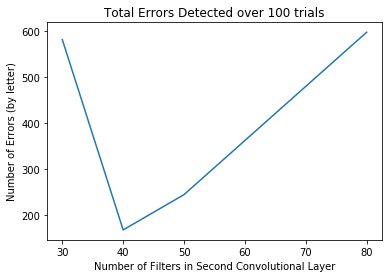

In [31]:

plt.plot(layer_two_filter,error_sums)
plt.title('Total Errors Detected over 100 trials')
plt.xlabel('Number of Filters in Second Convolutional Layer')
plt.ylabel('Number of Errors (by letter)')
plt.show()

# Determining Ideal Dense Node Count

In [44]:
num_nodes = [256,512,1024]
num_inputs = len(num_nodes)
many_models = []

for num in num_nodes:
    model = Sequential()
    model.add(Conv2D(10, (5, 5), padding="same", input_shape=(20, 20, 1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(40, (5, 5), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(num, activation="relu"))
    model.add(Dense(19, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=19, epochs=2, verbose=1)
    many_models.append(model)

Train on 71238 samples, validate on 23746 samples
Epoch 1/2
71238/71238 [==============================] - 116s 2ms/step - loss: 0.2066 - acc: 0.9450 - val_loss: 0.0835 - val_acc: 0.9762
Epoch 2/2
71238/71238 [==============================] - 107s 2ms/step - loss: 0.0557 - acc: 0.9852 - val_loss: 0.0638 - val_acc: 0.9832
Train on 71238 samples, validate on 23746 samples
Epoch 1/2
71238/71238 [==============================] - 138s 2ms/step - loss: 0.1678 - acc: 0.9565 - val_loss: 0.0676 - val_acc: 0.9825
Epoch 2/2
71238/71238 [==============================] - 107s 2ms/step - loss: 0.0485 - acc: 0.9877 - val_loss: 0.0522 - val_acc: 0.9875
Train on 71238 samples, validate on 23746 samples
Epoch 1/2
71238/71238 [==============================] - 133s 2ms/step - loss: 0.1612 - acc: 0.9568 - val_loss: 0.0774 - val_acc: 0.9788
Epoch 2/2
71238/71238 [==============================] - 129s 2ms/step - loss: 0.0480 - acc: 0.9870 - val_loss: 0.0498 - val_acc: 0.9881


In [45]:
for node_index in range(num_inputs):
    many_models[node_index].save('models/many_nodes/nodeNum_%d.h5'%(num_nodes[node_index]))

with open('models/many_nodes/model_label_map.dat','wb') as f:
    pickle.dump(lb,f)

In [46]:
test_list_full = os.listdir('grainy_samples/samples')
errors_matrix = []


for i in range(100):
    test_list = choices(test_list_full,k=10)
    passwords_list = []
    for model in many_models:
        for test_path in test_list:
            letters_list = get_letters_list2('grainy_samples/samples/%s'%test_path)
            if(type(letters_list[0])==str):
                break
            attempted_password = ''
            for letter_image in letters_list:
                letter_image = normalize_image_size(letter_image,20,20)
        #         cv2.imshow('letter',letter_image)
        #         cv2.waitKey(0)
        #         cv2.destroyAllWindows()
                letter_image = np.expand_dims(letter_image,axis=2)
                letter_image = np.expand_dims(letter_image,axis=0)
                prediction = model.predict(letter_image)
                attempted_password += lb.inverse_transform(prediction)[0]
            passwords_list.append(attempted_password)
    filtered_answers = [a.split('.')[0] for a in test_list]
#     print(len(passwords_list))
    if (len(passwords_list)/num_inputs)==len(filtered_answers):
        for j in range(num_inputs):
            for k in range(10):
                errors_per_model = sum([passwords_list[10*j:10*(j+1)][k][a]!=filtered_answers[k][a] for a in range(6)])
                errors_matrix.append(errors_per_model)
    print('Completed run #%d'%(i+1))
#     print(errors_per_model)

Completed run #1
Completed run #2
Completed run #3
Completed run #4
Completed run #5
Completed run #6
Completed run #7
Completed run #8
Completed run #9
Completed run #10
Completed run #11
Completed run #12
Completed run #13
Completed run #14
Completed run #15
Completed run #16
Completed run #17
Completed run #18
Completed run #19
Completed run #20
Completed run #21
Completed run #22
Completed run #23
Completed run #24
Completed run #25
Completed run #26
Completed run #27
Completed run #28
Completed run #29
Completed run #30
Completed run #31
Completed run #32
Completed run #33
Completed run #34
Completed run #35
Completed run #36
Completed run #37
Completed run #38
Completed run #39
Completed run #40
Completed run #41
Completed run #42
Completed run #43
Completed run #44
Completed run #45
Completed run #46
Completed run #47
Completed run #48
Completed run #49
Completed run #50
Completed run #51
Completed run #52
Completed run #53
Completed run #54
Completed run #55
Completed run #56
C

In [47]:
nodes256 = []
nodes512 = []
nodes1024 = []


for i in range(int(len(errors_matrix)/30)):
    for j in range(10):
        nodes256.append(errors_matrix[i*30+j])
        nodes512.append(errors_matrix[30*i+10+j])
        nodes1024.append(errors_matrix[30*i+20+j])

In [48]:
error_sums = [sum(nodes256),sum(nodes512),sum(nodes1024)]

In [49]:
error_sums

[848, 190, 441]

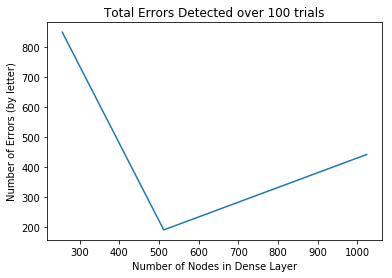

In [50]:

plt.plot(num_nodes,error_sums)
plt.title('Total Errors Detected over 100 trials')
plt.xlabel('Number of Nodes in Dense Layer')
plt.ylabel('Number of Errors (by letter)')
plt.show()